In [4]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.sql import Row
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import *

In [7]:
def csvParse(s):
     import csv
     from StringIO import StringIO
     sio = StringIO(s)
     value = csv.reader(sio).next()
     sio.close()
     return value

inspections = sc.textFile('wasb:///HdiSamples/HdiSamples/FoodInspectionData/Food_Inspections1.csv').map(csvParse)

In [8]:
inspections.take(1)

[['413707', 'LUNA PARK INC', 'LUNA PARK  DAY CARE', '2049789', "Children's Services Facility", 'Risk 1 (High)', '3250 W FOSTER AVE ', 'CHICAGO', 'IL', '60625', '09/21/2010', 'License-Task Force', 'Fail', '24. DISH WASHING FACILITIES: PROPERLY DESIGNED, CONSTRUCTED, MAINTAINED, INSTALLED, LOCATED AND OPERATED - Comments: All dishwashing machines must be of a type that complies with all requirements of the plumbing section of the Municipal Code of Chicago and Rules and Regulation of the Board of Health. OBSEVERD THE 3 COMPARTMENT SINK BACKING UP INTO THE 1ST AND 2ND COMPARTMENT WITH CLEAR WATER AND SLOWLY DRAINING OUT. INST NEED HAVE IT REPAIR. CITATION ISSUED, SERIOUS VIOLATION 7-38-030 H000062369-10 COURT DATE 10-28-10 TIME 1 P.M. ROOM 107 400 W. SURPERIOR. | 36. LIGHTING: REQUIRED MINIMUM FOOT-CANDLES OF LIGHT PROVIDED, FIXTURES SHIELDED - Comments: Shielding to protect against broken glass falling into food shall be provided for all artificial lighting sources in preparation, service

In [10]:
schema = StructType([
 StructField("id", IntegerType(), False),
 StructField("name", StringType(), False),
 StructField("results", StringType(), False),
 StructField("violations", StringType(), True)])

df = sqlContext.createDataFrame(inspections.map(lambda l: (int(l[0]), l[1], l[12], l[13])) , schema)
df.registerTempTable('CountResults')

In [11]:
df.show(5)

+------+--------------------+-------+--------------------+
|    id|                name|results|          violations|
+------+--------------------+-------+--------------------+
|413707|       LUNA PARK INC|   Fail|24. DISH WASHING ...|
|391234|       CAFE SELMARIE|   Fail|2. FACILITIES TO ...|
|413751|          MANCHU WOK|   Pass|33. FOOD AND NON-...|
|413708|BENCHMARK HOSPITA...|   Pass|                    |
|413722|           JJ BURGER|   Pass|                    |
+------+--------------------+-------+--------------------+
only showing top 5 rows

In [12]:
df.select('results').distinct().show()

+--------------------+
|             results|
+--------------------+
|                Fail|
|Business Not Located|
|  Pass w/ Conditions|
|     Out of Business|
|                Pass|
+--------------------+

In [17]:
%%sql -o countResultsdf
SELECT results, COUNT(results) AS cnt FROM CountResults GROUP BY results

AttributeError: 'module' object has no attribute 'api'

,results,cnt
0,Fail,3324
1,Business Not Located,6
2,Pass w/ Conditions,1033
3,Out of Business,281
4,Pass,8457


(-1.0119403371514504,
 1.0000000065864647,
 -1.0072197891905534,
 1.0028426768999037)

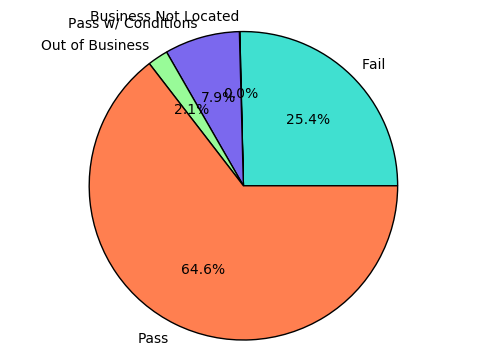

In [20]:
%%local
%matplotlib inline
import matplotlib.pyplot as plt

labels = countResultsdf['results']
sizes = countResultsdf['cnt']
colors = ['turquoise', 'seagreen', 'mediumslateblue', 'palegreen', 'coral']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.axis('equal')